# Start Wars Fans Preference Analysis

## Index

- [1 Introduction](#1)
- [2 Reading the data](#2)
- [3 Clean the Data, we must..](#3)
- [4 Fan Force](#4)
- [5 Fan Favourite](#5)
- [6 Wait...I've Seen That](#6)
- [7 Quite the Character](#7)
- [8 Hans? Greedo? Who Knows?!](#8)
- [9 Conclusion](#9)
- [10 Learnings](#10)
- [11 Acknowledgment](#11)

# 1

## Introduction

**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**
While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. 

They conducted the online survey by using SurveyMoney.The data link is [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

The data has several columns, including the following:
- [**RespondentID** — An anonymized ID for the respondent (person taking the survey)]
- [**Gender** — the respondent's gender]
- [**Age** — the respondent's age]
- [**Household Income** — the respondent's income]
- [**Education** — the respondent's education level]
- [**Location (Census Region)** — the respondent's location]
- [**Have you seen any of the 6 films in the Star Wars franchise?** — a Yes or No response]
- [**Do you consider yourself to be a fan of the Star Wars film franchise?** — a Yes or No response]

# 2

## Read the data

In [408]:
import pandas as pd 
# read the data
star_wars = pd.read_csv("StarWars.csv",encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [409]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

There are multiple issues with the data that have been detailed below:
- The column names, while sensible, are long and inconsistent with python standards
- The columns associated to the reply of the survey questions have values which are either *Yes*, *No*, *NaN* or the name of the columns themselves

These issues need to be corrected before proceeding with analysis.

# 3

## Clean the Data 

Clean the coloumns name.
Now due to the colonmns name are descriptive, we need to shorten the name for the furture analysis.

In [410]:
# re-name columns
 #Re-name columns
star_wars.rename(columns={'RespondentID':'participant_id',
                          'Have you seen any of the 6 films in the Star Wars franchise?':'watched_any',
                          'Do you consider yourself to be a fan of the Star Wars film franchise?':'star_wars_fan',
                          'Which of the following Star Wars films have you seen? Please select all that apply.':'episode_1',
                          'Unnamed: 4':'episode_2',
                          'Unnamed: 5':'episode_3',
                          'Unnamed: 6':'episode_4',
                          'Unnamed: 7':'episode_5',
                          'Unnamed: 8':'episode_6',
                          'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rating_ep1',
                          'Unnamed: 10':'rating_ep2',
                          'Unnamed: 11':'rating_ep3', 
                          'Unnamed: 12':'rating_ep4', 
                          'Unnamed: 13':'rating_ep5',
                          'Unnamed: 14':'rating_ep6',
                          'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'han_solo',
                          'Unnamed: 16':'luke_skywalker', 
                          'Unnamed: 17':'princess_leia', 
                          'Unnamed: 18':'anakin_skywalker', 
                          'Unnamed: 19':'obi_wan',
                          'Unnamed: 20':'emperor_palpatine', 
                          'Unnamed: 21':'darth_vader', 
                          'Unnamed: 22':'lando_calrissian', 
                          'Unnamed: 23':'boba_fett',
                          'Unnamed: 24':'c_3po', 
                          'Unnamed: 25':'r2_d2', 
                          'Unnamed: 26':'jar_jar_binks', 
                          'Unnamed: 27':'padme_amidala',
                          'Unnamed: 28':'yoda', 
                          'Which character shot first?':'shot_first',
                          'Are you familiar with the Expanded Universe?':'know_expand_uni',
                          'Do you consider yourself to be a fan of the Expanded Universe?æ':'expand_uni_fan',
                          'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan',
                          'Gender':'gender', 'Age':'age', 'Household Income':'income', 'Education':'education',
                          'Location (Census Region)':'location'},inplace=True)

After renaming the columns, it is now easier to analyse the columns. Next we shall clean the data in each of these columns.

In [411]:
star_wars.head(3)

,participant_id,watched_any,star_wars_fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rating_ep1,...,yoda,shot_first,know_expand_uni,expand_uni_fan,star_trek_fan,gender,age,income,education,location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Base on the anlaysis of the above columns we can identify columns sets as detailed below:
- The first two columns following *participant_id* and the last three columns before *gender* column have only values *Yes*, *No* or *NaN*. The *Yes* and *No* values can be replaced by boolean values *True* and *False*
- The columns associated to whether a movie was seen. Columns prefixed with *episode*
- The columns associated to movie ratings.
- The columns associated to ratings given to each charachter of the franchise.
Lets clean the same column sets below

### Clean Columns with Yes/No data 

We can clean the columns with *Yes*/*No* values by replacing the values with boolean *True* and *False*.

In [412]:
star_wars['watched_any'].value_counts()

Yes         936
No          250
Response      1
Name: watched_any, dtype: int64

In [413]:
star_wars['star_wars_fan'].value_counts()

Yes         552
No          284
Response      1
Name: star_wars_fan, dtype: int64

In [414]:
yes_no = {"Yes":True,
"No":False}
star_wars['watched_any'] = star_wars['watched_any'].map(yes_no)
star_wars['star_wars_fan'] = star_wars['star_wars_fan'].map(yes_no)


In [415]:
star_wars.loc[:,'watched_any':'star_wars_fan'].head(5)

,watched_any,star_wars_fan
0,NaN,NaN
1,True,True
2,False,NaN
3,True,False
4,True,True


In [416]:
star_wars['watched_any'].value_counts()

True     936
False    250
Name: watched_any, dtype: int64

In [417]:
star_wars.columns

Index(['participant_id', 'watched_any', 'star_wars_fan', 'episode_1',
       'episode_2', 'episode_3', 'episode_4', 'episode_5', 'episode_6',
       'rating_ep1', 'rating_ep2', 'rating_ep3', 'rating_ep4', 'rating_ep5',
       'rating_ep6', 'han_solo', 'luke_skywalker', 'princess_leia',
       'anakin_skywalker', 'obi_wan', 'emperor_palpatine', 'darth_vader',
       'lando_calrissian', 'boba_fett', 'c_3po', 'r2_d2', 'jar_jar_binks',
       'padme_amidala', 'yoda', 'shot_first', 'know_expand_uni',
       'expand_uni_fan', 'star_trek_fan', 'gender', 'age', 'income',
       'education', 'location'],
      dtype='object')

In [418]:
import numpy as np
# rename to other yes/no columns
star_wars.loc[:,'know_expand_uni':'star_trek_fan'].applymap(lambda val:True if val=='Yes' else( False if val=='No' else np.NaN))

,know_expand_uni,expand_uni_fan,star_trek_fan
0,NaN,NaN,NaN
1,True,False,False
2,NaN,NaN,True
3,False,NaN,False
4,False,NaN,True
...,...,...,...
1182,False,NaN,True
1183,False,NaN,True
1184,NaN,NaN,False
1185,False,NaN,True


### Cleaning columns with Episode Rating

In [419]:
star_wars[star_wars.columns[3:9]].head()

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [420]:
star_wars.iloc[0,8]

'Star Wars: Episode VI Return of the Jedi'

In [421]:
np.isnan(a)

False

In [422]:
for i in range(0,len(star_wars)):
    for y in range(3,9):
        a= pd.isna(star_wars.iloc[i,y])
        if a:
            star_wars.iloc[i,y] = False
        else:
            star_wars.iloc[i,y] = True

In [423]:
star_wars[star_wars.columns[3:10]].head()

,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rating_ep1
0,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace
1,True,True,True,True,True,True,3
2,False,False,False,False,False,False,NaN
3,True,True,True,False,False,False,1
4,True,True,True,True,True,True,5


In [424]:
# #Display columns related to episode ratings
# episode_columns = [each for each in star_wars.columns if 'episode' in each]
# star_wars[episode_columns].head(3)
# star_wars[episode_columns] = star_wars[episode_columns].applymap(lambda val:np.NaN if val is np.NaN else True)

##  Cleaning columns with Ratings of each Character

In [425]:
star_wars[star_wars.columns[9:15]].head()

,rating_ep1,rating_ep2,rating_ep3,rating_ep4,rating_ep5,rating_ep6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


In [426]:
star_wars.iloc[1:,9:15] = star_wars.iloc[1:,9:15].astype(float)

In [427]:
star_wars[star_wars.columns[9:15]].head()

,rating_ep1,rating_ep2,rating_ep3,rating_ep4,rating_ep5,rating_ep6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


## plot the Rank of star war movie!

In [428]:
means = star_wars.iloc[1:,9:15].mean()
means.reset_index()
means = means.sort_values(ascending=True)

In [429]:
means

rating_ep5    2.513158
rating_ep6    3.047847
rating_ep4    3.272727
rating_ep1    3.732934
rating_ep2    4.087321
rating_ep3    4.341317
dtype: float64

<AxesSubplot:>

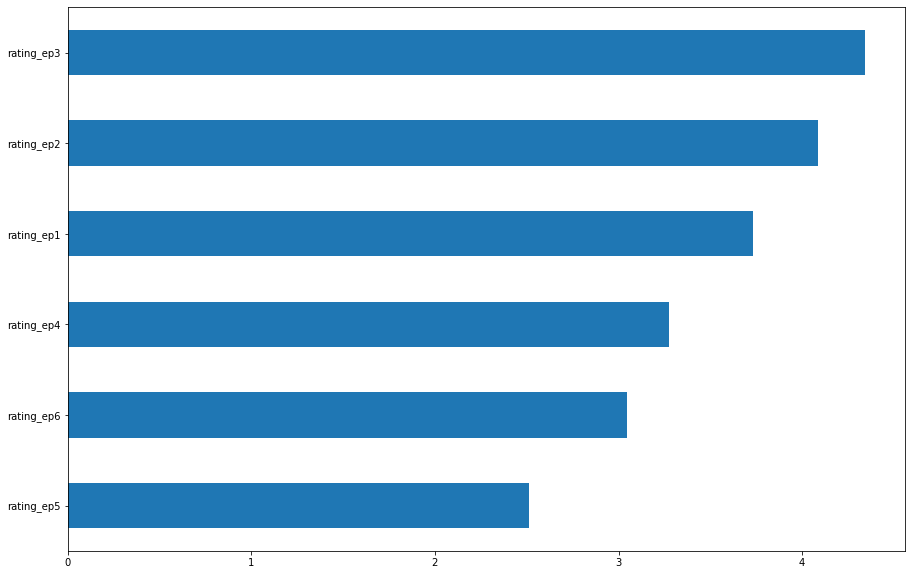

In [430]:
means.plot.barh()

The bar plot above shows that, while the fifth episode 'The Empire Strikes Back' is the best ranked film, the third episode 'Revenge of the Sith' is the worst ranked.

## Plot the most of watched films in star war film universer

In [431]:
watched = star_wars[star_wars.columns[3:9]].sum()
watched.reset_index()
watched = watched.sort_values(ascending=True)

In [432]:
watched

episode_3    551.0
episode_2    572.0
episode_4    608.0
episode_1    674.0
episode_6    739.0
episode_5    759.0
dtype: float64

<AxesSubplot:>

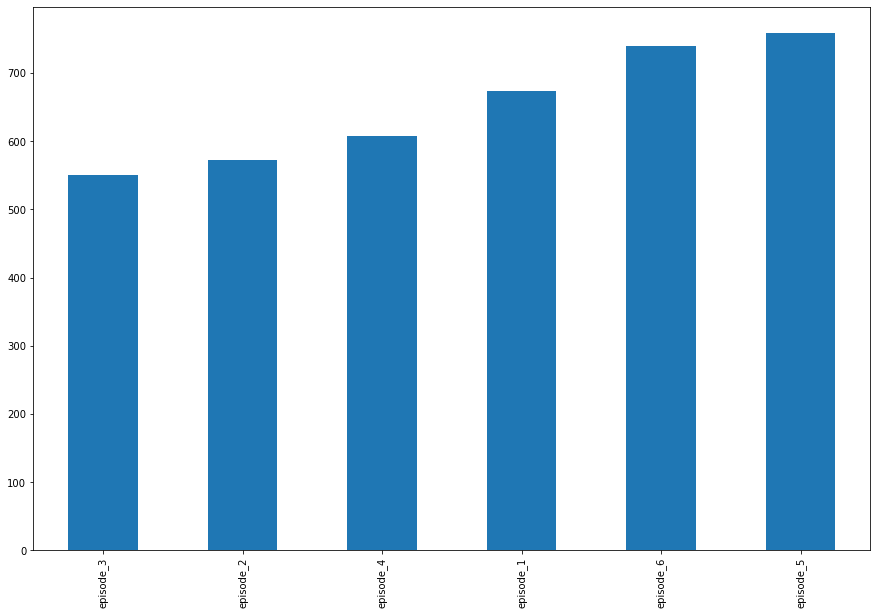

In [433]:
import matplotlib.pyplot as plt
watched.plot.bar()

# Do results could be affect differ by a fan of start war or the gentel?


In [434]:
males = star_wars[star_wars["gender"] == "Male"]
females = star_wars[star_wars["gender"] == "Female"]
means_males = males.iloc[1:,9:15].mean()
means_males.reset_index()
means_males = means_males.sort_values(ascending=True)
means_females = females.iloc[1:,9:15].mean()
means_females.reset_index()
means_females = means_females.sort_values(ascending=True)

In [435]:
means_females = means_females.reset_index()
means_females

,index,0
0,rating_ep5,2.570707
1,rating_ep6,3.078283
2,rating_ep1,3.435443
3,rating_ep4,3.537879
4,rating_ep2,3.954545
5,rating_ep3,4.416667


In [436]:
means_males = means_males.reset_index()
means_males

,index,0
0,rating_ep5,2.452607
1,rating_ep4,2.995261
2,rating_ep6,2.995261
3,rating_ep1,4.040284
4,rating_ep2,4.229858
5,rating_ep3,4.282660


In [437]:
watched_males = males[males.columns[3:9]].sum()

watched_males = watched.sort_values(ascending=True)
watched_males.reset_index()
watched_males

episode_3    551.0
episode_2    572.0
episode_4    608.0
episode_1    674.0
episode_6    739.0
episode_5    759.0
dtype: float64

In [438]:
watched_females = females[females.columns[3:9]].sum()

watched_females = watched_females.sort_values(ascending=True)
watched_females.reset_index()
watched_females

episode_3    222.0
episode_2    237.0
episode_4    255.0
episode_1    298.0
episode_6    338.0
episode_5    353.0
dtype: float64

In [439]:
watched_females = watched_females.reset_index()

In [440]:
watched_females['index']

0    episode_3
1    episode_2
2    episode_4
3    episode_1
4    episode_6
5    episode_5
Name: index, dtype: object

Text(0.5, 1.0, 'The most watched Star Wars of female')

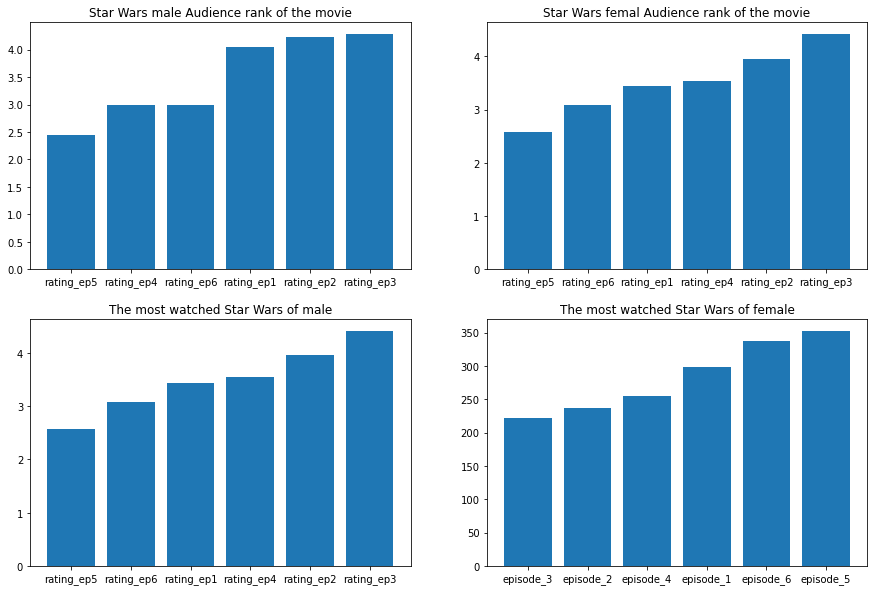

In [441]:
plt.rcParams["figure.figsize"] = [15, 10]

fig, axs = plt.subplots(2, 2)

axs[0,0].bar(x=means_males['index'], height=means_males[0])
axs[0,0].set_title('Star Wars male Audience rank of the movie')

axs[0,1].bar(x=means_females['index'], height=means_females[0])
axs[0,1].set_title('Star Wars femal Audience rank of the movie')

axs[1,0].bar(x=means_females['index'], height=means_females[0])
axs[1,0].set_title('The most watched Star Wars of male')

axs[1,1].bar(x=watched_females['index'], height=watched_females[0])
axs[1,1].set_title('The most watched Star Wars of female')

### Cleaning columns with Ratings of each Character

In [442]:
star_wars[star_wars.columns[15:29]].head(4)

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


In [443]:
star_wars[star_wars.columns[15:29]].head()

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably


Each of the character columns have the below values. These values will be replaced with appropriate scores which should help to calculate the ratings for each charachter of the franchise.

- Unfamiliar (N/A): np.NaN 
- Very favorably: 2
- Somewhat favorably: 1
- Neither favorably nor unfavorably (neutral): 0
- Somewhat unfavorably: -1
- Very unfavorably: -2    

In [444]:
star_wars['obi_wan'].value_counts(dropna=True)

Very favorably                                 591
Somewhat favorably                             159
Neither favorably nor unfavorably (neutral)     43
Unfamiliar (N/A)                                17
Somewhat unfavorably                             8
Very unfavorably                                 7
Obi Wan Kenobi                                   1
Name: obi_wan, dtype: int64

In [445]:
star_wars.drop(star_wars.index[0],inplace=True)

In [446]:
ratings_dict = {'Very favorably':2,
                'Somewhat favorably':1,
                'Neither favorably nor unfavorably (neutral)':0,
                'Somewhat unfavorably':-1,
                'Very unfavorably':-2,
                'Unfamiliar (N/A)':3}
char_cols = star_wars.columns[15:29]
star_wars[char_cols] = star_wars[char_cols].applymap(lambda rating:np.NaN if rating is np.NaN else ratings_dict[rating])
star_wars[char_cols].head(4)

,han_solo,luke_skywalker,princess_leia,anakin_skywalker,obi_wan,emperor_palpatine,darth_vader,lando_calrissian,boba_fett,c_3po,r2_d2,jar_jar_binks,padme_amidala,yoda
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-1.0,2.0,2.0,2.0,2.0,2.0


### cleaning the age column

The age columns hold age ranges as opposed to actual age of the indiviaual

In [447]:
star_wars['age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: age, dtype: int64

The *age* column can be categorized in to four group:
- \>60: Boomers
- 45-60: Gen X
- 30-44: Gen Y
- 18-29: Gen Z

This categorization can be mapped to the *age* column to enable easier analysis.

In [448]:
age_dict = {'> 60':'Boomers',
            '45-60':'Gen X',
            '30-44':'Gen Y',
            '18-29':'Gen Z'}
star_wars['age'] = star_wars['age'].apply(lambda age_range:np.NaN if age_range is np.NaN else age_dict[age_range])
star_wars['age'].value_counts()

Gen X      291
Boomers    269
Gen Y      268
Gen Z      218
Name: age, dtype: int64

### cleaning the Income column
The income column has the same issue as we had with age. This to will be categorized based on the ranges.m

In [449]:
star_wars['income'].value_counts()

$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Name: income, dtype: int64

In [450]:
income_dict = {"$50,000 - $99,999":"Lower Middle",
               "$25,000 - $49,999":"Middle",
               "$100,000 - $149,999":"Upper Middle",
               "$0 - $24,999":"Low",
               "$150,000+":"High"}
star_wars['income'] = star_wars['income'].map(income_dict)
star_wars['income'].head(5)

1             NaN
2             Low
3             Low
4    Upper Middle
5    Upper Middle
Name: income, dtype: object

#### Clean the education columns

In [451]:
star_wars['education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: education, dtype: int64

In [452]:
education_dict = {'Bachelor degree':'Bachelors',
                  'Some college or Associate degree':'Diploma',
                  'Graduate degree':'Masters',
                  'High school degree':'High School',
                  'Less than high school degree':'Primary School'}
star_wars['education']=star_wars['education'].map(education_dict)
star_wars['education'].head(5)

1    High School
2      Bachelors
3    High School
4        Diploma
5        Diploma
Name: education, dtype: object

In [453]:
star_wars['star_wars_fan'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: star_wars_fan, dtype: int64

Now that we have cleaned all the columns lets verify the data set as a whole and verify the state of the null values in the data.

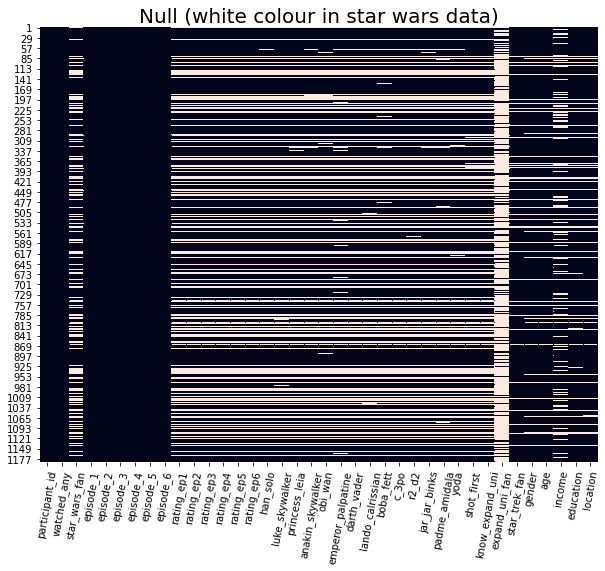

In [454]:
import seaborn as sns
%matplotlib inline 
check = star_wars.isnull()
fig,ax =  plt.subplots(figsize=(10,8))
sns.heatmap(check,cbar=False)
ax.set_xticklabels(labels = star_wars.columns,rotation=80)
ax.set_title("Null (white colour in star wars data)",size=20)
plt.show()

Clearly, there are a number of rows in the data set that are invalid. There are a number of participants who haven't highlighted their position with regards to being a fan. A quick assessment of those rows could help assess whether their related data points must be removed.

In [455]:
star_wars[star_wars["star_wars_fan"].isnull()].tail(10)

,participant_id,watched_any,star_wars_fan,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rating_ep1,...,yoda,shot_first,know_expand_uni,expand_uni_fan,star_trek_fan,gender,age,income,education,location
1144,3.288456e+09,True,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1151,3.288436e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Boomers,NaN,Bachelors,Middle Atlantic
1152,3.288432e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Gen X,Lower Middle,Diploma,West South Central
1154,3.288429e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Male,Gen Y,Lower Middle,Bachelors,West South Central
1158,3.288423e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Male,Gen X,Upper Middle,Masters,Middle Atlantic
1160,3.288422e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Boomers,Low,Diploma,West South Central
1169,3.288410e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Gen Y,High,Masters,East North Central
1171,3.288403e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Gen X,NaN,Masters,East North Central
1179,3.288395e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Gen Z,NaN,Primary School,West North Central
1184,3.288375e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,Gen Y,Lower Middle,Bachelors,Middle Atlantic


Based on the data above it is clear that these participants have nothing to share with regards to their preferences. All they have offered as part of the survey are some details relevant to them. We shall exclude this data and analyse the impact of the removal.

In [456]:
#Remove data associated incomplete fan status
star_wars = star_wars[star_wars["star_wars_fan"].notnull()]

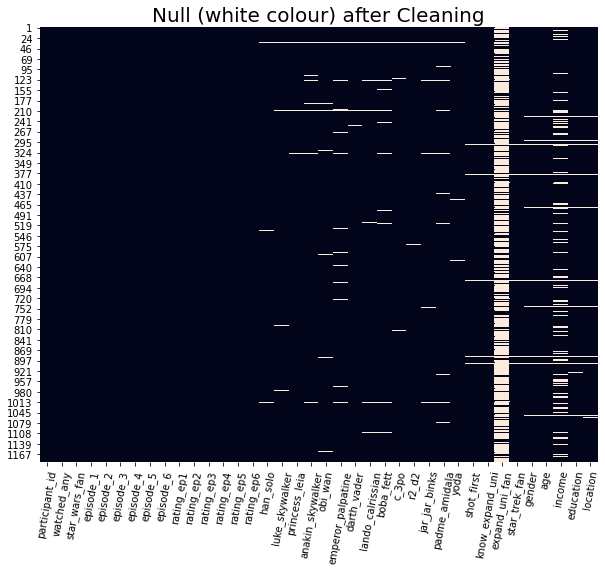

In [457]:
check = star_wars.isnull()
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(check,cbar=False)
ax.set_xticklabels(labels = star_wars.columns, rotation=80)
ax.set_title("Null (white colour) after Cleaning", size=20)
plt.show()

After removing all the invalid participant data another issue seems to reveal itself. While there are a number of survey responses wherein the the respondent has highlighted that they have seen only some or none of the movies, every respondent has given a ranking for all the Star Wars episodes. This seems incongrous.

A user in the Dataquest Community by the username *kwu* had highlighted this issue and revealed that the analysis by the fivethirtyeight team had only considered the survey responses of 471 participants when rating the best and worst movies since they were the only ones that watched all six. 

The data from fans that had not seen all the movies was used in conjunction with data from fans that had seen all movies for other analytical purposes as highlighted in their [article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/)

# 4

Star-Wars has a large following. Fans are from various demographics. We shall begin by analysing the spread of fans across the provided demographic elements namely, gender, age, income and education.

In [458]:
gender_percent = star_wars['gender'].value_counts(normalize=True)
age_percent = star_wars['age'].value_counts(normalize=True)
income_percent = star_wars['income'].value_counts(normalize=True)
education_percent = star_wars[star_wars['education']!= 'Primary School']['education'].value_counts(normalize=True)

In [459]:
gender_percent = gender_percent.reset_index()
age_percent = age_percent.reset_index()
income_percent = income_percent.reset_index()


In [462]:
education_percent = education_percent.reset_index()

In [469]:
education_percent

,level_0,index,education
0,0,Bachelors,0.322263
1,1,Diploma,0.312423
2,2,Masters,0.277983
3,3,High School,0.087331


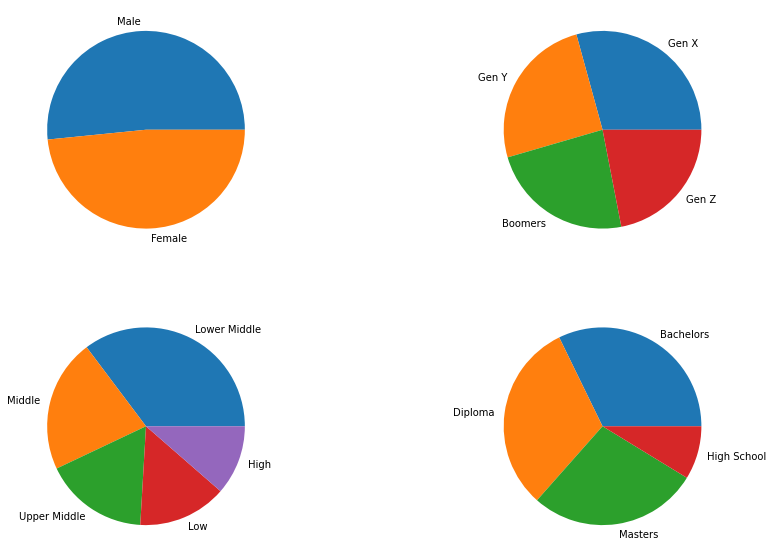

In [470]:
plt.rcParams["figure.figsize"] = [15, 10]

plt.subplot(2,2,1)
plt.pie(gender_percent['gender'],labels=gender_percent['index'])

plt.subplot(2,2,2)
plt.pie(age_percent['age'],labels=age_percent['index'])

plt.subplot(2,2,3)
plt.pie(income_percent['income'],labels=income_percent['index'])

plt.subplot(2,2,4)
plt.pie(education_percent['education'],labels=education_percent['index'])

plt.show()